**Autor: Alexandre Esposte Santos**

Para esta análise escolheu-se o conjunto de dados dos <a href = https://www.kaggle.com/datasets/marcosfnlr/acidentes-em-rodovias-federais-20072020> acidentes em rodovias federais de 2007 a 2020</a>.

Pretende-se com essa análise obter um maior compreendimento dos acidentes em rodoviais federais do Brasil. Como objetivos primários podemos listar,

<ul>

<li> Distribuição de acidentes pelos dias da semana    
<li> Existe alguma região cuja a quantidade de acidentes é discrepante quando comparada às outras?
<li> E com relação às rodovias? Há alguma com uma quantidade substâncial de acidentes?
<li> Com relação ao tipo do acidente, qual é o mais fatal?
<li> Quais os principais motivos dos acidentes?
<li> Há alguma relação entre a infraestrutura da pista e a quantidade de acidentes?
    
    
</ul>

In [1]:
# Importando os pacotes necessários para a análise

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

plt.style.use('default')

plt.style.use('seaborn-ticks')

cor = '#0000CD'

Lendo o conjunto de dados

In [2]:
# Lendo o dataset

df_raw = pd.read_csv("acidentes2007-2020.csv",sep=',',low_memory=False)
df_raw.head(3)

Unnamed: 0       id           id_unico dia_semana   horario  uf   br  \
0           0       10       102007-06-11    segunda  15:30:00  MG  381   
1           1  1032898  10328982007-08-13    segunda  14:25:00  MG   40   
2           2  1051130  10511302007-02-12    segunda  02:10:00  MA  135   

      km  municipio    causa_acidente  ... feridos_graves ilesos ignorados  \
0  623.2   OLIVEIRA  falta de atenção  ...              0      5         0   
1  585.5  ITABIRITO            outras  ...              1      2         0   
2   11.0   SAO LUIS  animais na pista  ...              1      0         0   

  feridos veiculos latitude longitude regional  delegacia  uop  
0       4        6      NaN       NaN      NaN        NaN  NaN  
1       1        1      NaN       NaN      NaN        NaN  NaN  
2       3        1      NaN       NaN      NaN        NaN  NaN  

[3 rows x 31 columns]

In [3]:
# Verificando as colunas
df_raw.columns

Index(['Unnamed: 0', 'id', 'id_unico', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

Observa-se que algumas colunas não nos servira de muita coisa e por isso serão removidas. As mesmas estão listadas abaixo junto com seus respectivos motivos,

<ul>
    
<li> 'Unnamed: 0': Essa coluna é simplesmente uma contagem e por isso será removida
   
<li> As colunas 'delegacia' e 'uop' estão trocadas e em uma primeira análise não nos servirá de muita coisa visto que está relacionada as unidades operacionais de polícia e as delegacias que atenderam ao acidente.
    
<li> 'latitude' e 'longitude' serão removidas pois já temos outras colunas que nos informa a localidade dos acidentes. Essas colunas seriam interessantes para uma visualização junto ao maps.
    
<li> A coluna 'regional' será removida devido que já temos outras colunas que informa a região.
    
<li> Por último, removeremos a coluna 'horário' uma vez que podemos utilizar a coluna fase_dia para determinar em qual período do dia houveram mais acidentes. 
    
    
</ul>    

In [4]:
colunas_remover = ['Unnamed: 0','delegacia','uop','latitude','longitude','regional','horario']

df_acidentes = df_raw.drop(columns=colunas_remover, axis=1)

Agora verificaremos se há regisros duplicados

In [5]:
print(f'Registros duplicados: {df_acidentes.duplicated().sum()}')

Registros duplicados: 0


Uma observação interessante está nas colunas 'id' e 'id_unico'. Observa-se que a coluna 'id_unico' é composta por dois valores, sendo o primeiro o valor da coluna 'id' e o segundo a data do acidente.

Vamos tratar a coluna 'id_unico' para assim termos em mãos a data do acidente

In [6]:
# Verificando o tipo das colunas id e id_unico
print(f"----Tipo----\n{df_acidentes[['id','id_unico']].dtypes}\n")


#Verificando se existe valor faltante
print(f"----Valores faltantes----\n{df_acidentes[['id','id_unico']].isna().sum()}")




----Tipo----
id           int64
id_unico    object
dtype: object

----Valores faltantes----
id          0
id_unico    0
dtype: int64


In [7]:
#Vamos mudar o tipo da coluna id para object(string)
df_acidentes = df_acidentes.astype({"id":str})

# vamos remover os valores da coluna "id" da coluna "id_unico" com o método replace
for ind,val in enumerate(df_acidentes['id']):
    df_acidentes.loc[ind,'id_unico'] = df_acidentes.loc[ind,'id_unico'].replace(val,'',1)
    
#Agora vamos remover a coluna id e renomear a coluna id_unico para data
df_acidentes.drop(columns=['id'],axis=1,inplace=True)

df_acidentes = df_acidentes.rename(columns={"id_unico": 'data'})

df_acidentes.head(1)

data dia_semana  uf   br     km municipio    causa_acidente  \
0  2007-06-11    segunda  MG  381  623.2  OLIVEIRA  falta de atenção   

     tipo_acidente classificacao_acidente   fase_dia  ... tracado_via  \
0  Colisão Frontal                    NaN  Pleno dia  ...        Reta   

  uso_solo pessoas mortos feridos_leves  feridos_graves  ilesos  ignorados  \
0    Rural       9      0             4               0       5          0   

   feridos  veiculos  
0        4         6  

[1 rows x 23 columns]

In [8]:
#Agora vamos mudar o tipo da variavel data para datetime
df_acidentes['data'] = pd.to_datetime(df_acidentes['data'],format='%Y-%m-%d')

# Vamos criar uma coluna apenas com o ano para facilitar em uma futura filtragem
df_acidentes['ano'] = df_acidentes['data'].dt.year

df_acidentes.head(3)

data dia_semana  uf   br     km  municipio    causa_acidente  \
0 2007-06-11    segunda  MG  381  623.2   OLIVEIRA  falta de atenção   
1 2007-08-13    segunda  MG   40  585.5  ITABIRITO            outras   
2 2007-02-12    segunda  MA  135   11.0   SAO LUIS  animais na pista   

             tipo_acidente classificacao_acidente     fase_dia  ... uso_solo  \
0          Colisão Frontal                    NaN    Pleno dia  ...    Rural   
1           Saída de Pista    Com Vítimas Feridas    Pleno dia  ...    Rural   
2  Atropelamento de Animal     Com Vítimas Fatais  Plena noite  ...   Urbano   

  pessoas mortos feridos_leves feridos_graves  ilesos  ignorados  feridos  \
0       9      0             4              0       5          0        4   
1       3      0             0              1       2          0        1   
2       5      2             2              1       0          0        3   

   veiculos   ano  
0         6  2007  
1         1  2007  
2         1  2007  

[3 rows x 24 columns]

# Análise

### **Observa-se o crescimento na quantidade de acidentes no intervalo de 2007 a 2011. Após 2011 observamos a queda dos acidentes até 2020**

In [9]:
print("Participação percentual de cada ano nos acidentes de 2007 a 2020\n")
df_acidentes['ano'].value_counts(normalize=True).mul(100)

Participação percentual de cada ano nos acidentes de 2007 a 2020



2011    10.385314
2013    10.084158
2012     9.966223
2010     9.907040
2014     9.136573
2009     8.566823
2008     7.615998
2007     6.894185
2015     6.596485
2016     5.203511
2017     4.833938
2018     3.737097
2019     3.642058
2020     3.430596
Name: ano, dtype: float64

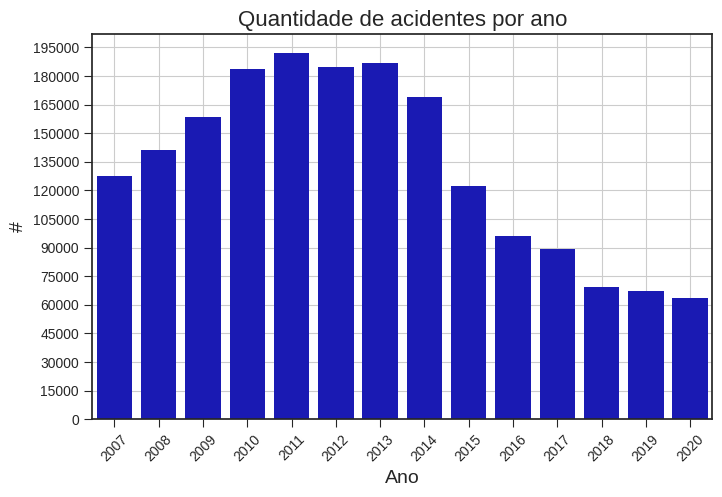

In [10]:
plt.figure(figsize=(8,5));
plt.title("Quantidade de acidentes por ano",fontsize=16);

sns.countplot(data = df_acidentes, x='ano',color=cor);

plt.xticks(rotation=45);
plt.yticks(ticks=range(0,200000,15000))

plt.xlabel('Ano',fontsize=14);
plt.ylabel("#",fontsize=14);
plt.grid()

### Observamos sazonalidade nos dias da semana. De 2007 a 2015 temos que a sexta-feira foi o dia da semana com mais acidentes, e de 2016 a 2020 tivemos alguns anos com sábado e outros o domingo com o pico de acidentes. 

### Conclui-se que grande parte dos acidentes ocorreram aos finais de semana !

In [11]:
# Verificando valores nulos na coluna dia_semana
print(f"Valores nulos na coluna dias_semana: {df_acidentes['dia_semana'].isna().sum()}")

Valores nulos na coluna dias_semana: 0


In [12]:
# Criando uma coluna para auxiliar no pivot_table
df_acidentes['auxiliar'] = 0

# Aqui temos um Dataframe separado com todas as contagens em todos os anos
aux = pd.pivot_table(df_acidentes,index='dia_semana',columns='ano',values='auxiliar',aggfunc=len)

aux

ano          2007   2008   2009   2010   2011   2012   2013   2014   2015  \
dia_semana                                                                  
domingo     20302  20670  22728  26682  28352  27179  26519  24248  18614   
quarta      16281  18913  20834  24443  25145  24243  24831  22637  16081   
quinta      17202  19040  22198  25165  26389  25555  25846  23300  16963   
segunda     16926  18811  21877  25434  26571  25503  26318  23604  17061   
sexta       20580  23221  26077  30182  30800  30826  30884  27883  18995   
sábado      20464  22338  24645  28256  30337  27925  28007  25799  19047   
terça       15916  18045  20287  23303  24728  23330  24340  21726  15397   

ano          2016   2017   2018   2019   2020  
dia_semana                                     
domingo     15562  14779  11265  11298  10416  
quarta      12109  11018   8814   8374   8152  
quinta      12773  11783   9217   8755   8241  
segunda     12914  12170   9410   9134   8518  
sexta       15088  13842  10624  10381   9763  
sábado      16261  15166  11227  11099  10663  
terça       11655  10760   8649   8405   7777

In [13]:
aux.columns = aux.columns.astype('str')

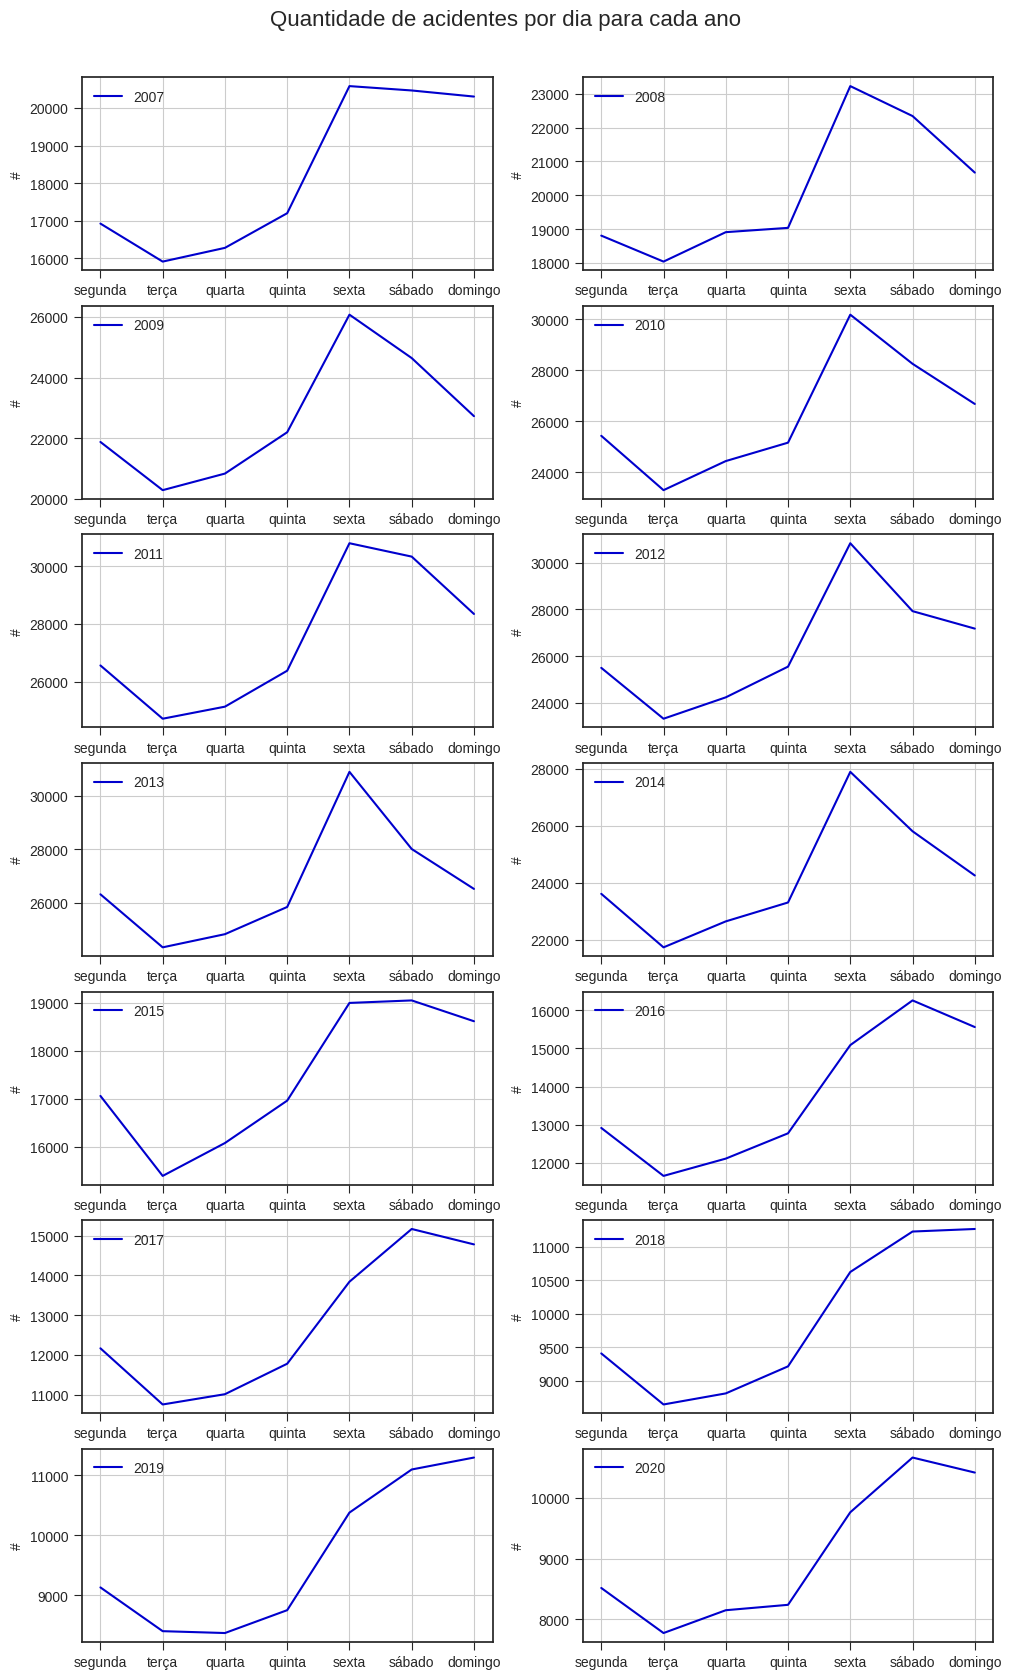

In [14]:
fig, ax = plt.subplots(nrows = 7,ncols=2,figsize=(10,16),constrained_layout=True);

fig.suptitle("Quantidade de acidentes por dia para cada ano",fontsize=16,y = 1.04)

ex = ['segunda','terça','quarta','quinta','sexta','sábado','domingo']

ano = 2007
for linha in range(7):
    for coluna in range(2):
        ey = [aux.loc[dia,str(ano)] for dia in ex]
        sns.lineplot(ax=ax[linha,coluna],x=ex,y=ey,label=f'{ano}',color=cor)
        ax[linha,coluna].legend(loc=2,bbox_to_anchor=(0,1))
        ax[linha,coluna].set_ylabel("#")
        #ax[linha,coluna].set_title(f"{ano}")
        ax[linha,coluna].grid()
        ano+=1


### **O estado de Minas Gerais corresponde a 14,42% sendo o lider da quantidade de acidentes. Em seguida temos Santa Catarina com 10,89% e Paraná com 10,29% dos acidentes**

### **Também observamos que o top 6 acidentes é composto pelos estados do Sul e Sudeste. Esses seis correspondem a aproximadamente 59,37% dos acidentes**

MG    14.424648
SC    10.890373
PR    10.291247
RJ     8.585291
RS     7.789445
SP     7.399027
BA     5.490573
GO     4.515664
ES     4.206732
PE     3.998348
MT     2.579400
PB     2.187362
CE     2.105391
RN     2.083413
PA     2.050635
MS     1.997716
RO     1.873301
MA     1.599685
PI     1.570795
AL     1.129132
DF     0.907140
SE     0.856002
TO     0.681799
AC     0.286846
RR     0.220372
AP     0.145907
AM     0.133109
Name: uf, dtype: float64

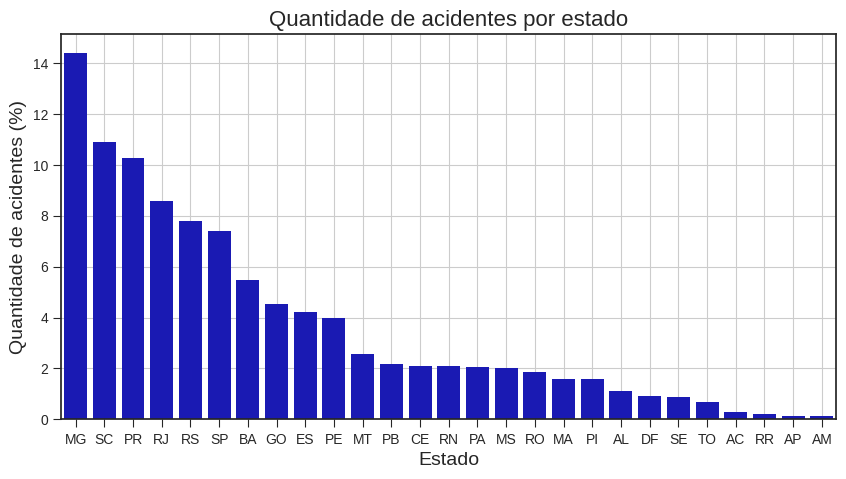

In [15]:
contagem = df_acidentes['uf'].value_counts(normalize=True).mul(100)

# Aqui estarei utilizando o gráfico de barras para dar uma variada e também 
# para plotar os estados de forma ordenada.

estado=[]
qt_acidentes =[]

for estado in contagem.index:
    qt_acidentes.append(contagem[estado])

plt.figure(figsize=(10,5));

plt.title("Quantidade de acidentes por estado",fontsize=16);
plt.xlabel("Estado",fontsize=14);
plt.ylabel("Quantidade de acidentes (%)",fontsize=14);

sns.barplot(x=contagem.index[:-1],y = qt_acidentes[:-1],color = cor)
plt.grid()
contagem[:-1]

### **Observamos que a pista simples corresponde a 52,20% dos acidentes, a dupla 40,22% e a Múltipla 7,57%**

### **Em um primeiro momento podemos pensar que a largura da pista tem alguma influência nos acidentes, visto que a quantidade de acidentes descresce conforme o tamanho da pista.**

In [16]:
df_acidentes['tipo_pista'].value_counts(normalize=True).mul(100)

Simples     52.204951
Dupla       40.225882
Múltipla     7.569167
Name: tipo_pista, dtype: float64

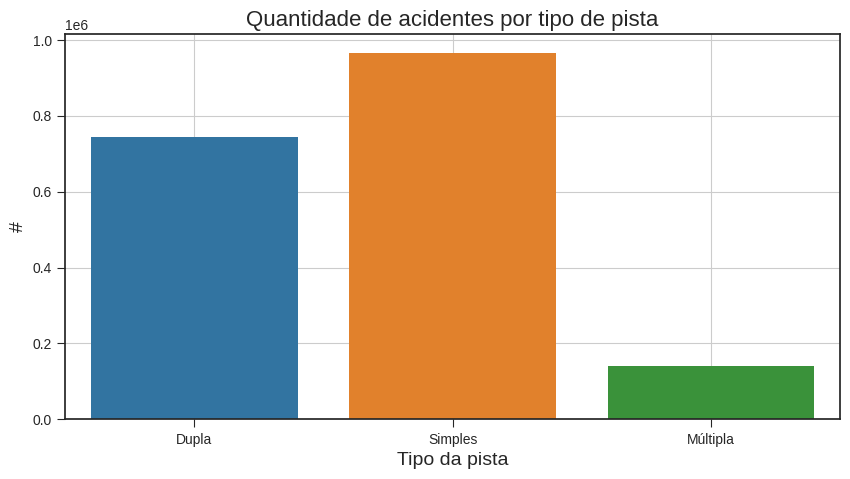

In [17]:
plt.figure(figsize=(10,5));

plt.title("Quantidade de acidentes por tipo de pista",fontsize=16);


sns.countplot(data=df_acidentes, x='tipo_pista')

plt.xlabel("Tipo da pista",fontsize=14);
plt.ylabel("#",fontsize=14);
plt.grid()

### **A principal causa dos acidentes se dão a falta de atenção com 27,40% dos casos**

### **Entretanto, o que é considerado falta de atenção? Ou melhor, o que o policial considerou como falta de atenção? Será que de fato foi falta de atenção?**

In [18]:
df_acidentes['causa_acidente'].value_counts(normalize=True).mul(100)[:5]

falta de atenção                      27.401025
outras                                24.365221
velocidade incompatível                8.807499
não guardar distância de segurança     8.525837
falta de atenção à condução            5.815543
Name: causa_acidente, dtype: float64

### **A maioria dos acidentes se dão por algum tipo de colisão e saída de pista.**

### **O acidente mais comum foi de colisão traseira com 26,34% dos acidentes**

In [19]:
df_acidentes['tipo_acidente'].value_counts(normalize=True).mul(100)[:5]

Colisão Traseira           26.337728
Colisão Lateral            15.589304
Saída de Pista             12.577456
Colisão Transversal        10.364160
Colisão com Objeto Fixo     5.087013
Name: tipo_acidente, dtype: float64

### **Vemos que grande parte das fatalidades ocorrem em colisões frontais (25,5%) enquanto que os acidentes sem fatalidades ocorrem com colisões traseiras (27%).**

### **De acordo com a cinemática a colisão frontal se torna fatal devido que a velocidade dos dois veiculos são somadas vetorialmente enquanto que na colisão traseira elas são subtraidas.** 

### **Portanto, uma colisão frontal se torna mais letal devido a soma das velocidades e a colisão traseira menos letal devido a subtração das velocidades**

In [20]:
morto = df_acidentes.query("classificacao_acidente == 'Com Vítimas Fatais' ")

vivo = df_acidentes.query("classificacao_acidente != 'Com Vítimas Fatais' ")

Colisão Frontal            25.508879
Atropelamento de Pessoa    15.007961
Colisão Traseira            9.063074
Colisão Transversal         8.633190
Name: tipo_acidente, dtype: float64

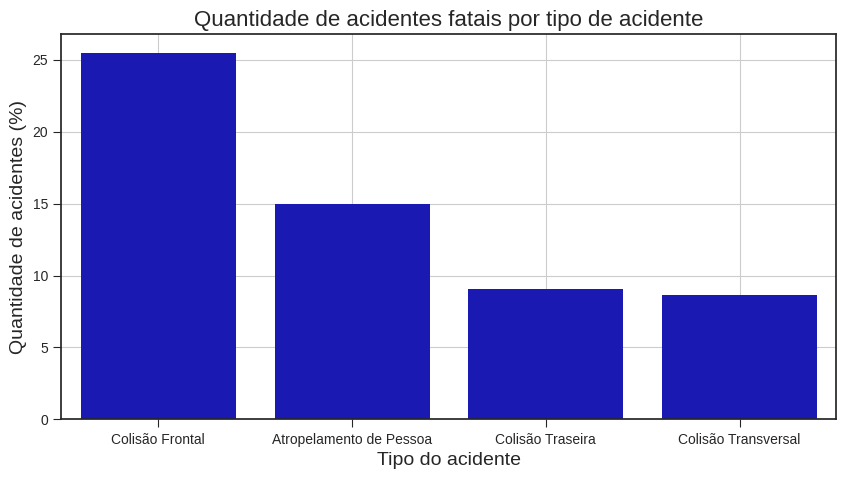

In [21]:
contagem = morto['tipo_acidente'].value_counts(normalize=True).mul(100)[:5]

# Aqui estarei utilizando o gráfico de barras para dar uma variada e também 
# para plotar os estados de forma ordenada.

tipo=[]
qt_acidentes =[]

for tipo in contagem.index:
    qt_acidentes.append(contagem[tipo])

plt.figure(figsize=(10,5));

plt.title("Quantidade de acidentes fatais por tipo de acidente",fontsize=16);
plt.xlabel("Tipo do acidente",fontsize=14);
plt.ylabel("Quantidade de acidentes (%)",fontsize=14);

sns.barplot(x=contagem.index[:-1],y = qt_acidentes[:-1],color = cor)
plt.grid()
contagem[:-1]

Colisão Traseira       27.134515
Colisão Lateral        15.989579
Saída de Pista         12.780003
Colisão Transversal    10.444000
Name: tipo_acidente, dtype: float64

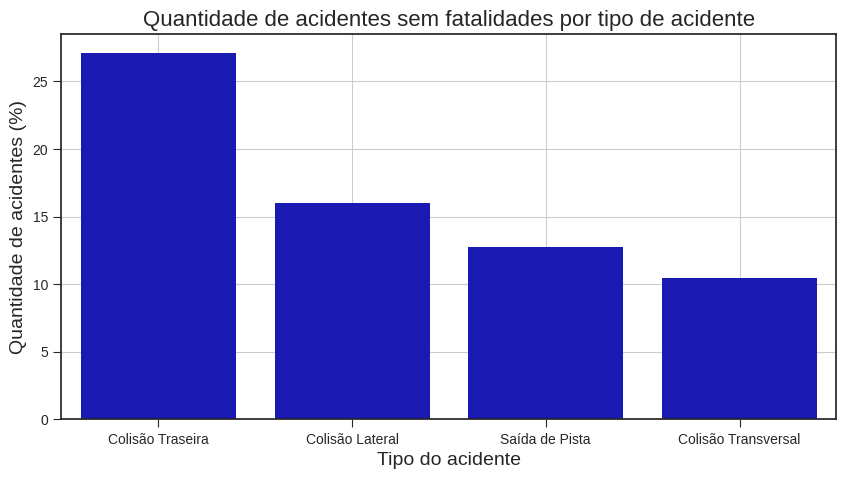

In [22]:
contagem = vivo['tipo_acidente'].value_counts(normalize=True).mul(100)[:5]

# Aqui estarei utilizando o gráfico de barras para dar uma variada e também 
# para plotar os estados de forma ordenada.

tipo=[]
qt_acidentes =[]

for tipo in contagem.index:
    qt_acidentes.append(contagem[tipo])

plt.figure(figsize=(10,5));

plt.title("Quantidade de acidentes sem fatalidades por tipo de acidente",fontsize=16);
plt.xlabel("Tipo do acidente",fontsize=14);
plt.ylabel("Quantidade de acidentes (%)",fontsize=14);

sns.barplot(x=contagem.index[:-1],y = qt_acidentes[:-1],color = cor)
plt.grid()
contagem[:-1]

### **70% dos acidentes acontecem em trechos com reta e 20,9% em trechos curvilíneos**

### **Isso parece ter relação com os acidentes de colisão frontal. Muitas pessoas se arriscam em ultrapassagens perigosas quando encontram trechos em linha reta**

In [23]:
df_acidentes['tracado_via'].replace("(null)",np.nan,inplace=True)



In [24]:
df_acidentes['tracado_via'].value_counts(normalize=True).mul(100)

Reta                     70.125253
Curva                    20.901150
Cruzamento                5.503779
Não Informado             1.608225
Interseção de vias        0.712637
Desvio Temporário         0.433997
Rotatória                 0.321137
Retorno Regulamentado     0.179442
Viaduto                   0.110646
Ponte                     0.086292
Túnel                     0.017442
Name: tracado_via, dtype: float64

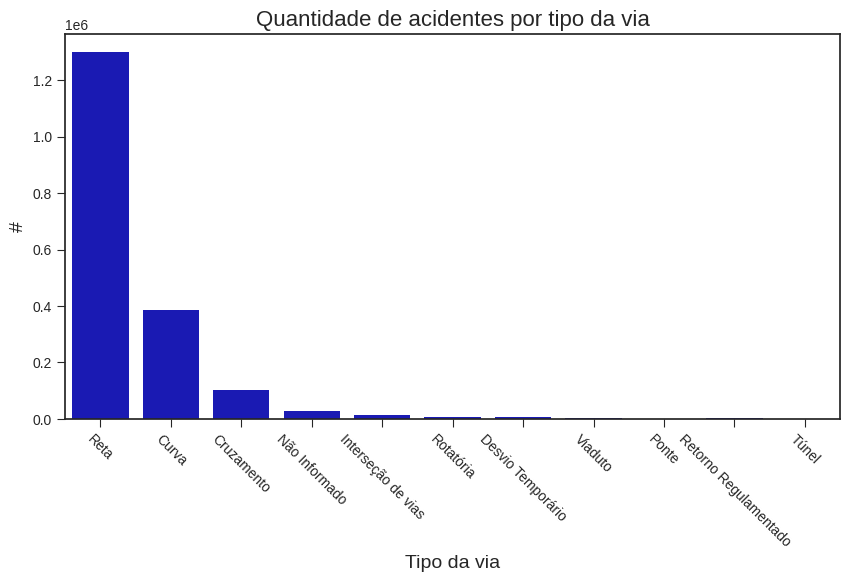

In [25]:
plt.figure(figsize=(10,5));

plt.title("Quantidade de acidentes por tipo da via",fontsize=16);

plt.xticks(rotation=-45)

sns.countplot(data = df_acidentes,x='tracado_via',color=cor)
plt.xlabel("Tipo da via",fontsize=14);
plt.ylabel("#",fontsize=14);

###  **A BR 101 é a rodovia com mais acidentes (17,13%) e ao mesmo tempo a mais fatal, em segundo temos a rodovia 116 (16,9%).**

### Somos tentados a pensar que a extensão da rodovia é um fator que influência na quantidade de acidentes e consequentemente nas fatalidades. Apesar de ter sentido, tal fato não é suficiente para explicar os acidentes.

### Existem brs tão extensas quanto as brs 116 e 101 e nem por isso elas estão no mesmo patamar. A br 153 é um exemplo, ela começa no sul e vai até o norte e nem por isso tem tantas fatalidades que nem a 101 e 116.

### Outro exemplo é a br 381, que é configurada como a terceira br com mais acidentes, que liga São Paulo ao Espirito Santo. É uma br pequena e esta entre os primeiros colocados em acidentes e fatalidades

In [26]:
df_acidentes['br'].unique()

array(['381', '40', '135', '222', '230', '277', '101', '251', '70', '116',
       '158', '280', '470', '60', '386', '376', '316', '10', '232', '262',
       '282', '473', '242', '290', '153', '50', '343', '104', '267',
       '163', '365', '304', '364', '392', '20', '287', '235', '367',
       '472', '402', '293', '226', '324', '210', '354', '414', '476',
       '495', '424', '373', '471', '110', '393', '319', '601', '463',
       '452', '406', '407', '285', '493', '174', '605', '317', '428',
       '408', '459', '468', '418', '146', '465', '469', '450', '423',
       '401', '488', '356', '405', '410', '259', '361', '480', '427',
       '460', '156', '330', '425', '377', '432', '80', '308', '419',
       '412', '429', '485', '433', '(null)', '604', '416', '404', '30',
       '474', '107', '498', '303', '7', '216', '0', '447', '120', '272',
       '422', '47', '4', '467', '369', '487', '869', '451', '351', '759',
       '147', '191', '143', '762', '958', '490', '409', '208', '400',
    

In [27]:
df_acidentes['br'].replace("(null)",np.nan,inplace=True)

df_acidentes.dropna(subset=['br'],axis=0,inplace=True)

df_acidentes['br'] = pd.to_numeric(df_acidentes['br'],downcast='integer')

df_acidentes['br'].unique()

array([381,  40, 135, 222, 230, 277, 101, 251,  70, 116, 158, 280, 470,
        60, 386, 376, 316,  10, 232, 262, 282, 473, 242, 290, 153,  50,
       343, 104, 267, 163, 365, 304, 364, 392,  20, 287, 235, 367, 472,
       402, 293, 226, 324, 210, 354, 414, 476, 495, 424, 373, 471, 110,
       393, 319, 601, 463, 452, 406, 407, 285, 493, 174, 605, 317, 428,
       408, 459, 468, 418, 146, 465, 469, 450, 423, 401, 488, 356, 405,
       410, 259, 361, 480, 427, 460, 156, 330, 425, 377, 432,  80, 308,
       419, 412, 429, 485, 433, 604, 416, 404,  30, 474, 107, 498, 303,
         7, 216,   0, 447, 120, 272, 422,  47,   4, 467, 369, 487, 869,
       451, 351, 759, 147, 191, 143, 762, 958, 490, 409, 208, 400, 173,
       359, 142,   1, 420, 332, 870, 544, 298, 756, 707, 155, 421, 634,
       415, 349, 140,  28, 661, 462, 352, 617, 580, 221, 560, 654, 241,
       499, 501, 489,  84, 687, 178, 552, 453, 505, 183, 265, 426, 270,
       441, 152, 681, 154, 767, 719, 323, 337, 851, 268,   2, 18

In [28]:
df_acidentes['br'].value_counts(normalize=True).mul(100).sort_values(ascending=False)[:5]

101    17.138991
116    16.945834
381     6.076842
40      5.033111
153     3.809295
Name: br, dtype: float64

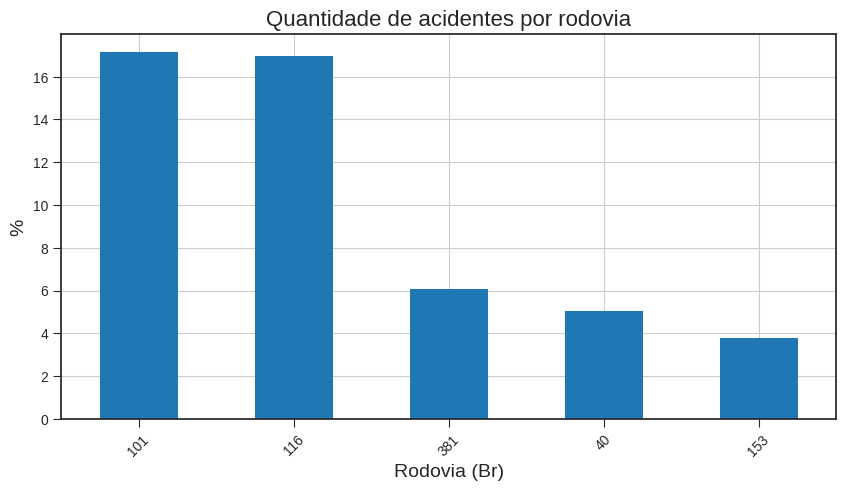

In [29]:
plt.figure(figsize=(10,5));

plt.title("Quantidade de acidentes por rodovia",fontsize=16);

df_acidentes['br'].value_counts(normalize=True).mul(100).sort_values(ascending=False)[:5].plot.bar();

plt.xlabel("Rodovia (Br)",fontsize=14);
plt.ylabel("%",fontsize=14);
plt.xticks(rotation=45);
plt.grid()

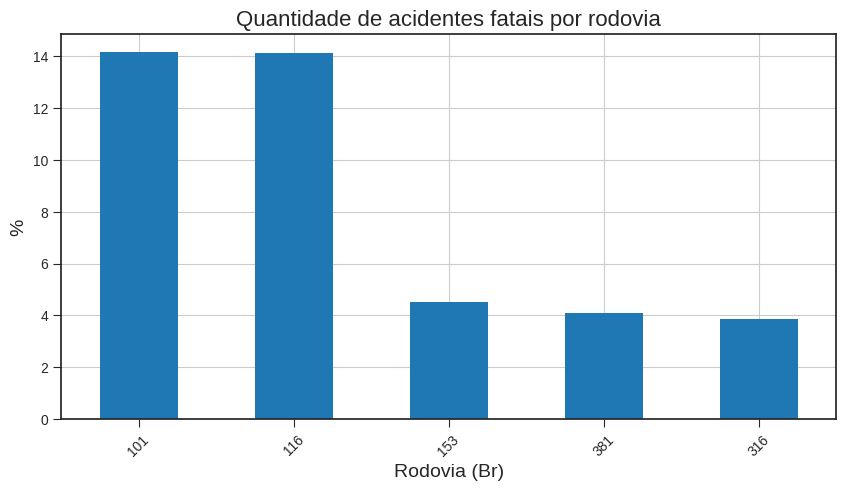

In [30]:
plt.figure(figsize=(10,5));

plt.title("Quantidade de acidentes fatais por rodovia",fontsize=16);

df_acidentes.query("classificacao_acidente == 'Com Vítimas Fatais'")['br'].value_counts(normalize=True).mul(100).sort_values(ascending=False)[:5].plot.bar();

plt.xlabel("Rodovia (Br)",fontsize=14);
plt.ylabel("%",fontsize=14);
plt.xticks(rotation=45);
plt.grid()

As br's 101 e 116 são rodovias de dimensões continental. Ambas ligam o Brasil de Norte a Sul.

Para fins de curiosidade a ponte Rio-Niterói faz parte da br 101 e a Serra das Araras faz parte da br 116.

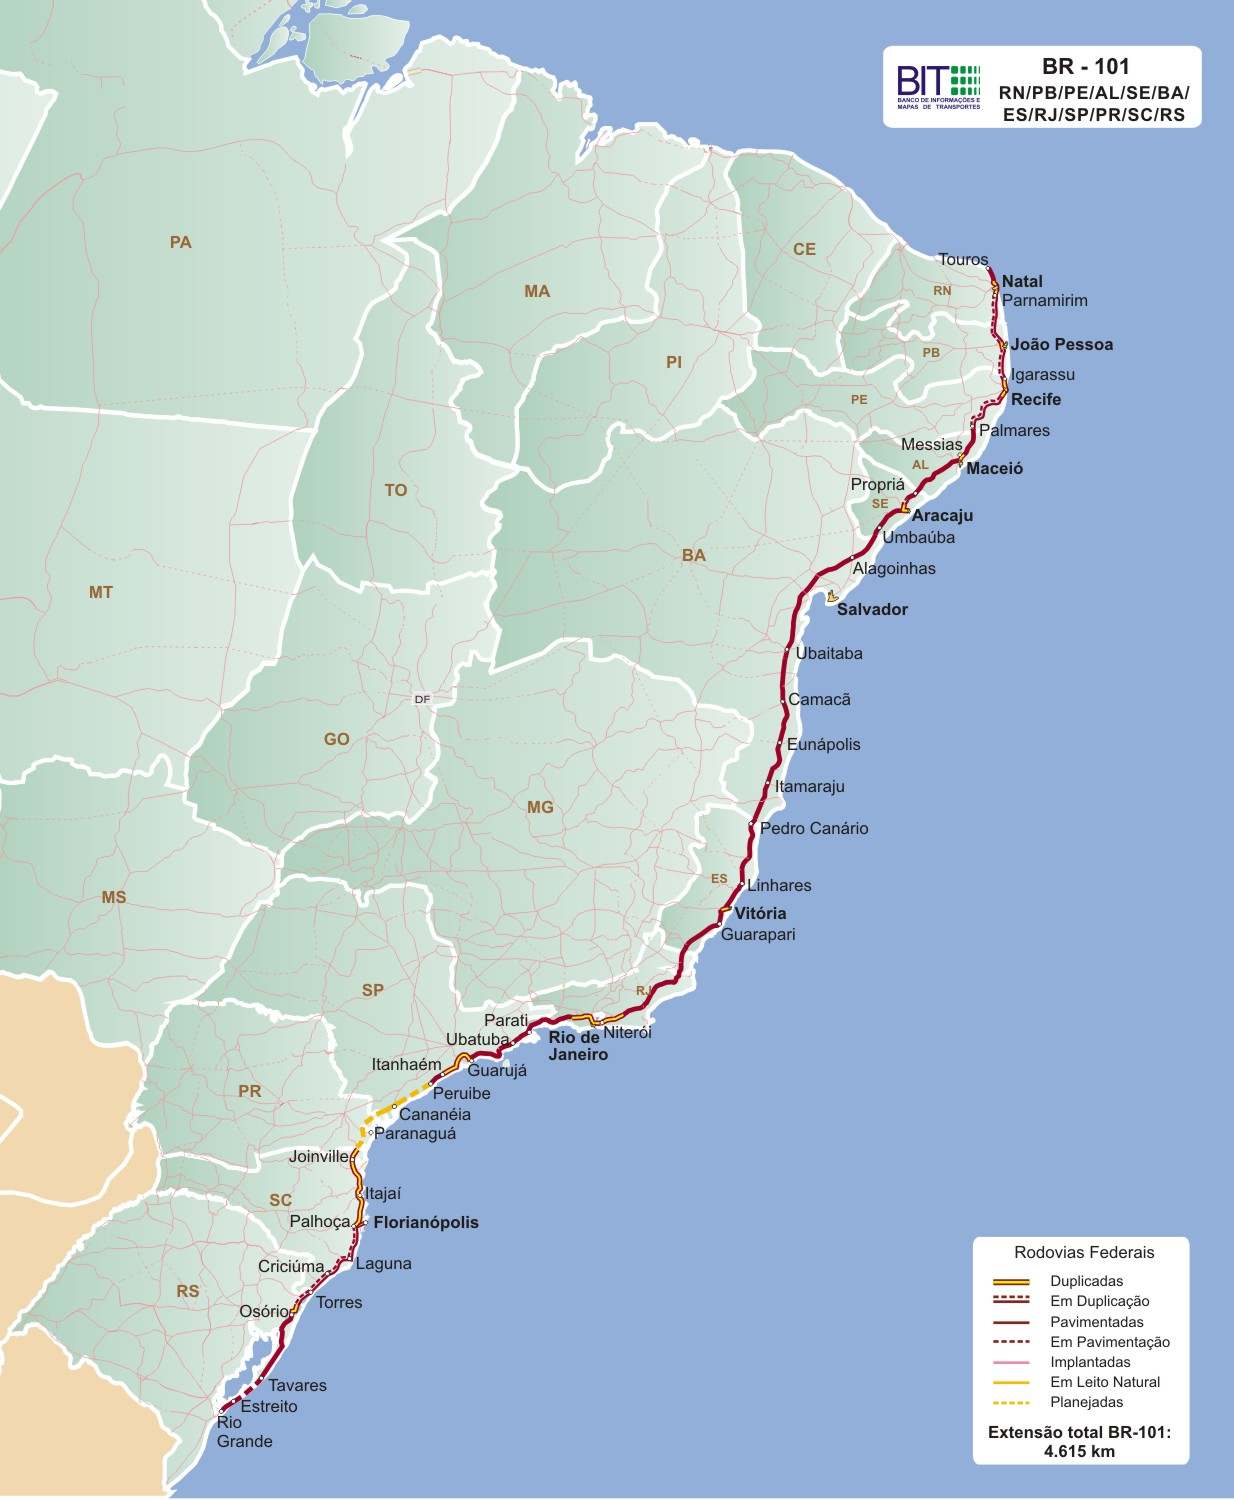

fonte: https://pt.wikipedia.org/wiki/BR-101#/media/Ficheiro:Mapa_da_BR-101.jpg


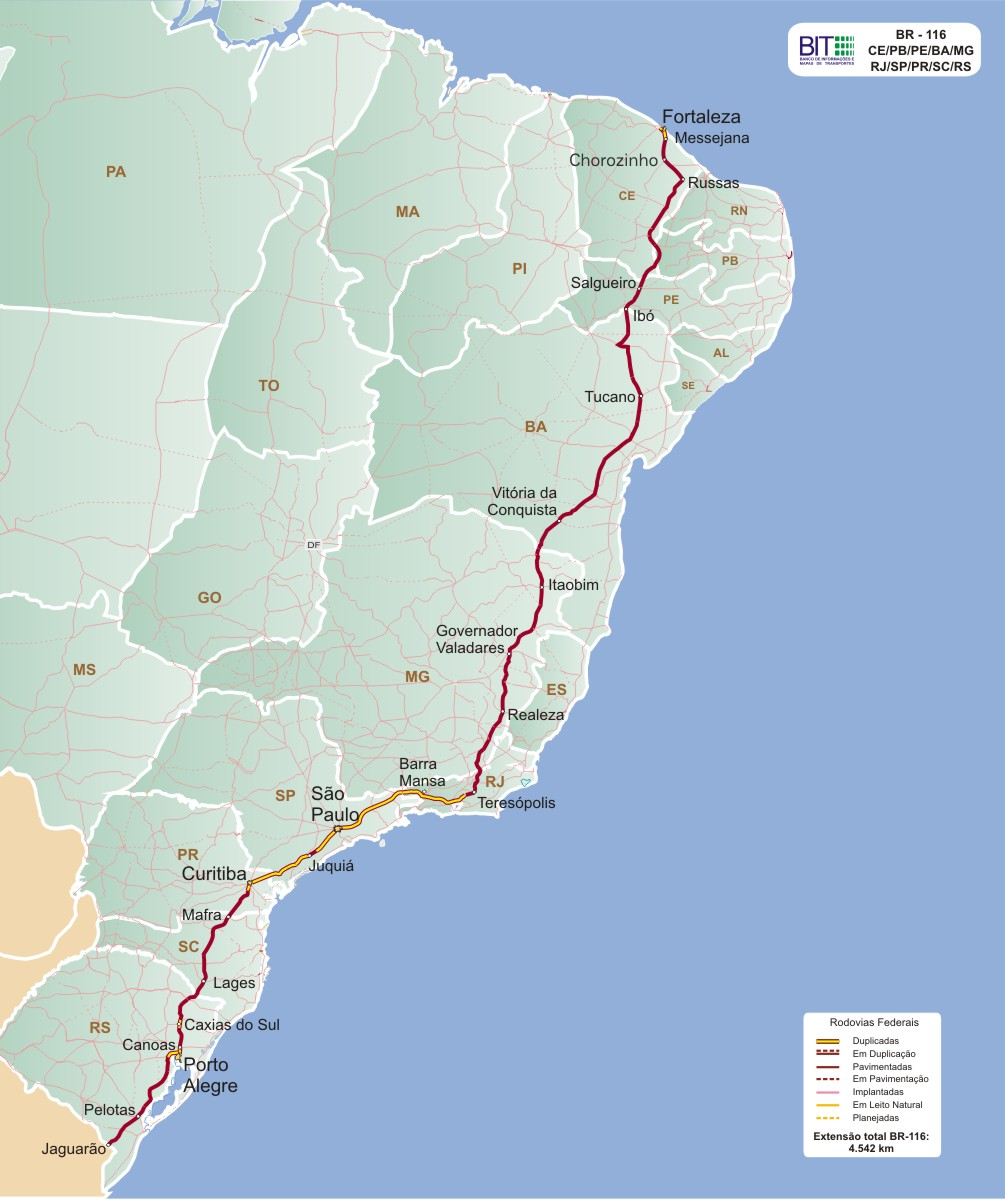

fonte: https://pt.wikipedia.org/wiki/BR-116#/media/Ficheiro:Br-116mapa.jpg

### Os resultados seguintes são apenas para fins de curiosidade

Para esta seção eu estarei utilizando o módulo express do plotly para as visualizações gráficas, aqui focarei no estado de Minas Gerais em 2020

In [31]:
minas = df_acidentes.query(" uf == 'MG' and ano == 2020")


In [32]:
fig = px.histogram(minas,x='feridos_leves',nbins=50)

fig.update_layout(title= "Quantidade de pessoas com ferimentos leves",title_x= 0.5,title_font_size=20)

fig.update_xaxes(title='N° de pessoas',title_font_size=16)
fig.update_yaxes(title='#')

fig.show()

In [33]:
fig = px.box(minas,x='pessoas')

fig.update_layout(title= "Quantidade de pessoas",title_x= 0.5,title_font_size=20)

fig.update_xaxes(title='N° de pessoas',title_font_size=16)
fig.update_yaxes(title='#')

fig.show()

Temos certas assimetrias devido aos outliers em nosso conjunto de dados, para isso podemos utilizar de outras maneiras para visualizar a distribuição dos nossos dados

In [34]:
# Função de distribuição

fig = px.ecdf(minas,x=['pessoas','mortos'],marginal='histogram')

fig.update_layout(title= "Quantidade de pessoas",title_x= 0.5,title_font_size=20)

#fig.update_xaxes(title='N° de pessoas',title_font_size=16)
#fig.update_yaxes(title='%',title_font_size=16)

fig.show()

Observamos do gráfico ecdf acima que há muito mais pessoas do que mortos, i.e uma boa parcela sobreviveu.

<AxesSubplot:>

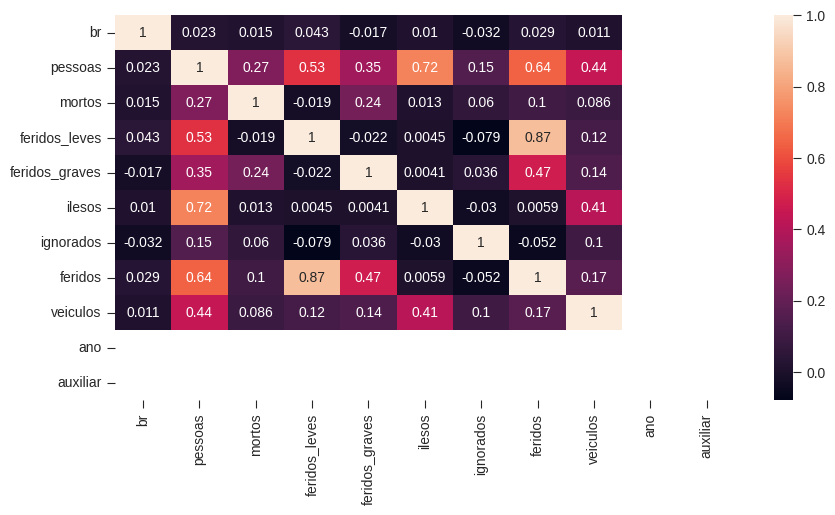

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(minas.corr(),annot=True)

In [36]:
fig = px.scatter(minas,x='pessoas',y='feridos')

fig.update_layout(title='Feridos vs Pessoas',title_x=0.5)

fig.show()

Temos uma correlação alta com a quantidade de pessoas e a quantidade de feridos. Entretanto, isso já é o que esperamos!! 

É meio obvio que quanto mais pessoas estiverem envolvidas em um acidente mais pessoas **poderão** ficar feridas.

Por fim, vamos plotar veiculos x pessoas e categorizar pela classificação de acidentes

In [37]:
fig = px.scatter(minas,x='veiculos',y='pessoas',color='classificacao_acidente')

fig.update_layout(title='Pessoas vs Veiculos',title_x=0.5)

fig.show()

A quantidade de veiculos não me parece ser uma variável que explique muita coisa